#**Python Classes**
This series (building classes) starts our journey to learning about creating user defined types (classes) in Python. We have been using classes for a while now (e.g collections.Counter) and have mentioned types several times (e.g. type(['a']), type(1)).

At one point in Python's past, there was a difference between types and classes, but they are essentially the same and can be used interchangeably. Almost everything in Python (numbers, lists, strings) is associated with a class. This lesson is about learning to design and create classes.

#**Why Classes?**

Without classes, we would have to rely on modules (separate files like libraries) and functions. Although this may not sound too bad, in many situations it's easier to model and build a solution using classes.

##**Classes, Objects, Instances**

![](https://drive.google.com/uc?export=view&id=1TWFyOvNtj2E0gwj9mNWs9gwrakWG8Zmu)

A class is a blueprint to how to make instances (a.k.a. objects). Instances are a specific instantiation of a class. The python type function lets you know what class an instance belongs to. Each instance of a class (i.e. an object) is located somewhere in memory. The id function in Python, lets you know where in memory an instance is located (stored):

In [48]:
def simple10():
  return 10
a = 10
print(type(a), id(a), type(simple10))

<class 'int'> 140652408085072 <class 'function'>


You almost never need to use those functions, but they are super handy for debugging a situation where you need to manage instances. And as you can see even functions have a class in Python.




> **Coder's Log:** If you are really curious, see what happens when you do the following print(id(a), id(10), id(simple10())). Python actually reserves memory for some of the constants.

A class is simply a container that holds functions and data (a function inside a class is called a method). A class is used to help organize your code. When you build a class, you are usually putting functions (and data) that belong together.

##**Encapsulation**

Classes are an abstract design to help encapsulate data and functions that work on that data. Encapsulation is the idea of putting items that belong together is a common container. The word data can mean both the internal data the class is 'holding' (think of the collection.Counter) but also properties of the class. Properties are just variables inside a class.

If you had a Person class, you might have properties first_name and last_name. Because the data is walled off (you need to use the class/object to access the data), it provides a level of security. We call the bundling of data and the methods that work on that data encapsulation.


## **World Modeling**

Deciding how and when to use classes comes with experience and practice. If you ever have a group of functions that work on the same data, that is a clue that a class can help you. Take a look at the following code. It demonstrates a simple way to calculate the GPA for a student's classes.



```
def update_name(data):
   pass

def calculate_gpa(data):
   pass

def show_classes(data):
   pass

def build_data():
   return {'classes': [{'name': 'info', 'credits':3, 'type': 'fun', 'grade':90.00},
                       {'name': 'econ 101', 'credits':4, 'type': ' not fun', 'grade':80.00}]}

data= build_data()
update_name(data, 'info', 'mh2')
calculate_gpa(data)
show_classes(data)
```

###**Family of functions**

In the above code, you have a group of functions that all work on the same data. This is a classic case where using a class would be better. Why? All those functions work on the same type of data (it's been passed in as a parameter). Sometimes you see similar code, but work on, gasp , global data. In any case, it's hard to manage those functions as you need to always remember that they 'belong' together. If the structure of the data changes, you would have to remember to update the corresponding functions.

###**Architecting a multiple component solution**

Another case for using classes is when you need to model a solution that involves different parts or components. For example, if you were building a text analysis engine , you might want to use a class to represent the text, a class to manage building the text class from data, and different classes to manage algorithms to work on that text. The class architecture helps you keep a separation of concerns and build code that can be de-coupled (to some point).






#**Building Classes**
The standard way in Python is put similar functions in the same file (called a module or library).

The functions in the same file/module/library usually have some unifying purpose. Classes are done similarly. You put a class in a file and call that a module. Modules can have more than one class in them. But the standard practice is to have one public class per module. The word public in this context is referring to how you want others to use your class. The public classes are the ones available for others to use. Some classes can be considered private or protected as well -- definitions we will get to later.


>  **Coder's Log:** The word package usually refers to a collection of modules. A module is a single file of python code that can be imported.



#**Class Syntax**
Much like creating a function in Python, creating a class involves using a few special keywords. We will start by building a class the models a 2D point. A 2D point has an x value and a y value.

![](https://drive.google.com/uc?export=view&id=1ya_2bjSRxtdo-gSrc1Fd6_r3kn0BYkRf)

Here's the syntax for creating the Point2D class:

```
class Point2D(object):
  def __init__(self, xp, yp):
      self.x = xp
      self.y = yp
```

Here's how to read that class definition: Let's look at this code line by line:

class Point2D(object):
* using the keyword class, we define a new class named Point2D
* when you create a class in Python you should **Capitalize** the first letter and use *CamelCase*. You can read more about [naming conventions](https://www.python.org/dev/peps/pep-0008/#class-names)
* the thing named object inside the () is called the base class. It is optional and we will discuss it in a later lesson. But the Point2D class can do everything the object class can do.
* the **:** marks the start of the class implementation

def \__init__(self, xp, yp): 
* the keyword def is used just like for defining functions.
* the name \__init__ is reserved for classes. The init method (method is the name of a function inside a class) gets called when you create a new object (i.e. an instance of the class). It is called the **constructor method**.
* the double underscores __ around the name init signal to the reader that the function is 'private'. Functions with the double underscore are called dunder functions you can [read more](https://www.python.org/dev/peps/pep-0008/) about them
* this init method has three arguments: self, xp, yp. The self argument refers to the **specific instance of the class**. All other parameters after the self argument can be given any valid Python variable name. In this case both xp and yp are just the names of the formal parameters.


###**An important note about respecting privacy**

Those who use your code (including the author -- you), should never call methods that begin with an _ (single or double) outside of the class code. Python won't enforce it, but you will announce to the world that you do not care about conventions, best practices, and building robust code.

self.x = xp
* this sets the internal variable x (meant to be managed only by the specific instance of Point2D) to the value held in the parameter xp
* self.y = yp does the same but with y and yp
* both x and y are called attributes (we'll see later how attributes become **properties**).


###**An important note to self**

The keyword ***self*** is used to refer to the specific memory location where the instance is living. It can only be used inside the class. Other languages use this to denote the same thing. As you will see, when you want to refer to methods, data, properties from inside the class, you need to use self.


#**Creating Class Instances**

Once the basic class is finished, you can now create instances. You just created the blueprint for what a class instance will 'look' like to Python. Every time you create a new instance, the \__init__ method is called (also named the class constructor) and the new instance is created.

```
start = Point2D(4, 5)
end = Point2D(10, 8)

print(start)
```

**Exercise: Code it Up**
Go ahead and create the class and the two instances (start and end)

You can confirm that each instance created is living at a separate memory location.

```
print(id(start))
print(id(end))
```

In [49]:
from functools import *

@total_ordering
class Point2D(object):
	def __init__(self, x, y) -> None:
		super().__init__()
		self.x = x
		self.y = y

	def __str__(self) -> str:
		return super().__str__() + " as point 2d"
	
	def __repr__(self):
		return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)

	def __eq__(self, o: object) -> bool:
		return self.x == o.x and self.y == o.y
	
	def __gt__(self, o: object) -> bool:
		return self.x > o.x and self.y > o.y

start = Point2D(4, 5)
end = Point2D(5, 7)

print(id(start))
print(id(end))
print(repr(start))
print(str(start))

140652523748080
140652523747120
x:4.00, y:5.00
x:4.00, y:5.00 as point 2d


#**Adding Methods**
###**Better Printing**

What happened when you printed the instance start? It wasn't very user-friendly was it? We can fix that by adding a \__repr__ method to our Point2D class. The repr method gets called by print or anytime you need to convert an instance to a string representation (as a reminder, it's called dunder method due to the (double underscores):

```
def __repr__(self):
   return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)
```

Add that code to the above class and re-run the code cell to see the better printing.

> **Coder's Log:** Python also has a \__str__ method that can be used to get the
string version of the object. Informally, \__str__ is used to get a 'readable' version (\__repr__ gets the official representation). If you **don't** implement \__repr__ but the method \__str__ instead, Python will use that when it needs a string representation of the object.


###**Better Equality**

Another issue (yet to be seen) is the following:




In [50]:
starta = Point2D(4,5)
startb = Point2D(4,5)
print(starta == startb)

True


As a default, Python will use the memory location of an object to determine equality. Two instances are equal if they occupy the same place in memory. However, for many classes, you will want a domain specific version of what it means for two objects/instances to be equal. For us, two points are equal if their x and y attributes are the same. We'll use another double underscore method to implement equality:

```
def __eq__(self, other):
   return other is not None and self.x == other.x and self.y == other.y
```

Re-run the two point equality test. Also make note that the \__eq__ implementation guards against a comparison to None.

> **Coder's Log:** Another convenient thing Python does is when it sees the == sign (e.g. starta == startb), Python will call the object's dunder method \__eq__. Python also allows you to define other operators as well.


**Distance Between Two Points (2-D)**

![](https://drive.google.com/uc?export=view&id=1lkNMW0RXDSeu83jK56mQlSvaejrYp5Ag)

The distance between two points is given by:

![](https://drive.google.com/uc?export=view&id=1n5NCxWde3uL5o-NcgwbfKHqQmJstQtM7)


**Exercise adding distance**

Add a method named distance that calculates the distance between itself and another point: 
* use the math.sqrt to find the square root.
* once this is done, the following should work:

```
start = Point2D(4,5)
end = Point2D(10,8)
print(start.distance(end))
```

In [51]:
import math

@total_ordering
class Point2D(object):
	def __init__(self, x, y) -> None:
		super().__init__()
		self.x = x
		self.y = y

	def __str__(self) -> str:
		return super().__str__() + " as point 2d"
	
	def __repr__(self):
		return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)

	def __eq__(self, o: object) -> bool:
		return self.x == o.x and self.y == o.y
	
	def __gt__(self, o: object) -> bool:
		return self.x > o.x and self.y > o.y

	def distance(self, o: object) -> float:
		return math.sqrt((self.x - o.x)**2 + (self.y - o.y)**2)

start = Point2D(4, 5)
end = Point2D(5, 7)

print(id(start))
print(id(end))
print(repr(start))
print(str(start))
start.distance(end)

140652524017840
140652524018032
x:4.00, y:5.00
x:4.00, y:5.00 as point 2d


2.23606797749979

#**A Dissonance Distance**

Perhaps you didn't notice (we are still new at this), but does the function distance belong in the class Point2D?

Creating and designing software is filled with these kind of questions and decisions. It's actually not clear at this point. But as you build out your classes, expect some methods and functionality to migrate from one class to another. Also, as the code inside a class grows, you should ask yourself if using another class makes sense as well.

At first it may be perfectly fine to keep the distance method in Point2D. However, perhaps it makes more sense to create a Line class that encapsulates the idea of distance between 2 points. Let's do that.

Fill in the Line class so the following code works (don't worry about \__eq__):
* the \__init__ method will take two parameters of type Point2D
* add only two attributes to hold the two points
* add the method so line instances can be printed (format is up to you) 
* add the distance method

In [52]:
import math

@total_ordering
class Point2D(object):
	def __init__(self, x, y) -> None:
		super().__init__()
		self.x = x
		self.y = y

	def __str__(self) -> str:
		return super().__str__() + " as point 2d"
	
	def __repr__(self):
		return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)

	def __eq__(self, o: object) -> bool:
		return self.x == o.x and self.y == o.y
	
	def __gt__(self, o: object) -> bool:
		return self.x > o.x and self.y > o.y

	def distance(self, o: object) -> float:
		return math.sqrt((self.x - o.x)**2 + (self.y - o.y)**2)


class Line(object):
  def __init__(self, start, end) -> None:
    super().__init__()
    self.start = start
    self.end = end

  @property
  def distance(self) -> float:
    return self.start.distance(self.end)
  
  def __str__(self) -> str:
      return super().__str__() + " at length {:.2f}".format(self.distance)

start = Point2D(4,5)
end = Point2D(10,8)

# we create a line with 2 points
line = Line(start, end)
print(line)
print(line.distance)

<__main__.Line object at 0x7fec37bb2b20> at length 6.71
6.708203932499369


#**Better Lines**
Perhaps we are bit rusty on our line geometry and algebra, but you may remember that every line has two features:

* a **slope** which signals how fast/slow the line changes (steep/shallow). 
* a **y intercept** which is a point that crosses the y axis.

Let's create methods for both of those line attributes.

###**Calculating Slope**

Take a close look at the image below to verify you understand the math that is used to calculate the slope using two points (start and end in the image).


![](https://drive.google.com/uc?export=view&id=1L9Ov774QA92OwuhXtxU3Pd8zj6fzmX9K)

```
class Line(object):
  def __init__(self, start, end):
    self.start = start
    self.end = end

    self.slope = None # calculate me !!!
  
  def get_slope(self):
    return self.slope

  # ... more code
```

Update the
Line
class so the following code will work. Note that we are
ignoring the issue ofvertical lines where △x is 0 (infinite slope).

In [53]:

class Line(object):
	def __init__(self, start, end) -> None:
		super().__init__()
		self.start = start
		self.end = end

	def distance(self) -> float:
		return self.start.distance(self.end)
  
	def __str__(self) -> str:
	  return super().__str__() + " at length {:.2f}".format(self.distance)

	def get_slope(self) -> float:
		return (self.end.y - self.start.y) / (self.end.x - self.start.x)

	def get_y0(self) -> float:
		return self.start.y - self.start.x * self.get_slope()
	



# put the entire updated Line class here
start = Point2D(4,5)
end = Point2D(10,8)
line = Line(start, end)
print(line.get_slope())
print(line.get_y0())

0.5
3.0


###**Calculating y intercept (a.k.a b, y0 )**

The next value to calculate is where the line crosses the Y axis. It's called the the y- intercept.


![](https://drive.google.com/uc?export=view&id=1qWLYU3zikezmkASYB5ZlyWjOUstartT93u6)

In order to find where the line crosses the Y axis, we will start with the basic slope-intercept equation for a line (hopefully, this (perhaps?) looks familiar):

              y = mx + b

* b is the y intercept
* m is the slope
* x is independent variable that marks its location on the X axis
* y is the calculated value (based on both the slope and y intercept)

Let's get our algebra gears going and solve for b:

![](https://drive.google.com/uc?export=view&id=1dwQwe-boopu_uGLRuAE6OtctFZmfeZY8)

Add the following to your Line class. In the example, we are using y0 for the y intercept.

```
def __init__(self):
  # ... previous
  self.y0 = None # do the calculation

def get_y0(self):
  return self.y0
```

Once that is done, the following code should work

```
start = Point2D(4,5)
end = Point2D(10,8)
line1 = Line(start, end)
print(line1.get_slope())
print(line1.get_y0())
print(line1.distance())
```

#**Plotting Lines**
Let's make sure things are working, by plotting the line. You should get a line similar to the images.

4 5 10 8


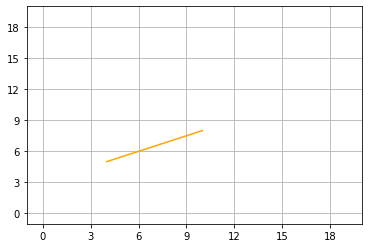

In [54]:
def plot_lines(lines):
  import matplotlib.pyplot as plt
  from matplotlib.ticker import MaxNLocator

  fig,axes = plt.subplots()
  colors = ['orange', 'b', 'y', 'b', 'g']
  for idx, line in enumerate(lines):
    print(line.start.x, line.start.y, line.end.x, line.end.y)
    x = [line.start.x, line.end.x]
    y = [line.start.y, line.end.y]
    axes.plot(x,y, color = colors[idx%len(colors)])
  axes.set_ylim(-1,20)
  axes.set_xlim(-1,20)
  axes.grid()
  axes.yaxis.set_major_locator(MaxNLocator(integer=True))
  axes.xaxis.set_major_locator(MaxNLocator(integer=True))
  


plot_lines([line])

#**Lines in the general form**
The previous line equation (called slope-intercept form) can also be written in the general form of a line: Ax + Bx + C = 0.

![](https://drive.google.com/uc?export=view&id=1p8cM0--k6WA9d2MhlQ3InqCvzePLSdPx)

Through the [magic of algebra](https://www.mathematics-monster.com/lessons/how_to_convert_a_linear_equation_from_general_form_to_slope_intercept_form.html), you can solve for A, B, C if you have two points.

The following is a new class that implements the algebra. That is given two points, it calculates the A,B,C coefficients.

In [55]:
class GeneralLine(object):
  def __init__(self, start, end):

    self.A     = end.y - start.y
    self.B     = -(end.x - start.x)
    self.C     = start.y * end.x - start.x * end.y
    
    self.slope = (-self.A/self.B)
    self.y0    = (-self.C/self.B)
    
    self.start = start
    self.end = end
  
  def get_slope(self):
    return self.slope
  
  def get_y0(self):
    return self.y0

4 5 10 8
10 8.0 20 13.0


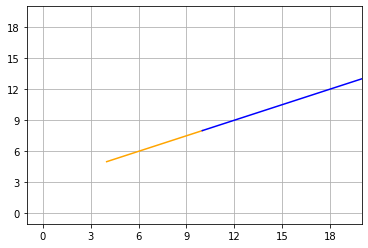

In [56]:
import random
def build_general(line):
  random.seed(42) # life itself

  # pick a random x between -10, and 20
  x1 = random.randint(-10, 20)
  # make x2 is 10 x-steps away
  x2 = x1 + 10
  
  # solve for y1, y2 using x1, x2
  # y = mx + b
  y1 = line.get_slope()*x1 + line.get_y0()
  y2 = line.get_slope()*x2 + line.get_y0()
  
  # create new points
  start = Point2D(x1, y1)
  end = Point2D(x2, y2)
  
  return GeneralLine(start, end)

g_line = build_general(line)
plot_lines([line, g_line])

Now we can visually confirm that the math is correct by generating 2 random points on the same line:

```python
import random
def build_general(line):
  random.seed(42) # life itself

  # pick a random x between -10, and 20
  x1 = random.randint(-10, 20)
  # make x2 is 10 x-steps away
  x2 = x1 + 10
  
  # solve for y1, y2 using x1, x2
  # y = mx + b
  y1 = line.get_slope()*x1 + line.get_y0()
  y2 = line.get_slope()*x2 + line.get_y0()
  
  # create new points
  start = Point2D(x1, y1)
  end = Point2D(x2, y2)
  
  return GeneralLine(start, end)

g_line = build_general(line1)
plot_lines([line1, g_line])
```

Be sure to implement all the above code. And confirm that the lines have the same slope.

#**Back to Class**

Currently we have built 3 classes: Point2D, Line, GeneralLine. I hope you can see the huge benefits of encapsulating all the data, logic and methods into classes. Without classes, we would have a large set of functions that would require a lot of remembering which functions belong together.

**An Issue with Privacy**

Let's run the following code and see if we can spot a problem:

4 5 10 8
0.5
4 5 -7.4 8
-0.2631578947368421


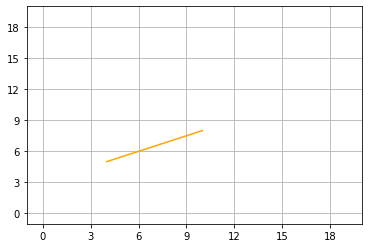

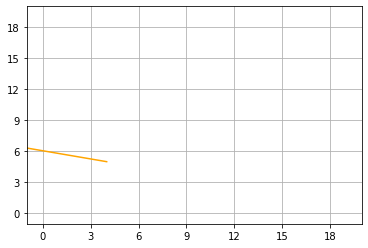

In [57]:
start = Point2D(4,5)
end = Point2D(10,8)
lineA = Line(start, end)
plot_lines([lineA])
print(lineA.get_slope())

end.x = -7.4
plot_lines([lineA])
print(lineA.get_slope())

What happened? Do you see the issue?

We created a line (and plotted it), then the client code (the one that is using the library/module/class changed the x value for a point. This had a strange side effect in that the line changed as well!

The user of the Point2D instance, modified the internal data of the instance, but neither the line nor the point instance were able to defend themselves. This is the worst kind of code graffiti.

Be sure you understand the issue. It's bad enough that the data for the point instance was modified, but it also affected the line instance.
This is a problem and we **need** to fix it.


###**Decorating Privacy**

The major issue is that a line's slope is based on the x and y values of the points that make up a line. If a point value is changed, ideally, any calculation done that depends on the new value, needs to be updated as well.

In most cases, it's easiest just to 'wall off' or prevent such invasions of privacy.


Variable visibility is about the access rights to a variable. We have seen function visibility and its local variables. Any variable defined in a function is only visible for that function (i.e. function visibility). For a class, a variable's privacy determines what others can read or write to the attributes.

Encapsulation is supposed to help us with this kind of problem. Many object oriented (OO for short) languages (e.g. Java, C++) provide language constructs to mark data with a certain level of privacy.

Unfortunately, it requires a bit more work to enforce privacy in Python. There are some general conventions:

* name all 'private' attributes with a leading underscore (e.g. self._x) 
* add getters/setters methods (e.g. get_x(), set_x(new_value))
* use a property decorator

Let's go over each of the options in detail:

**Add a leading _ your attributes**

If a variable/attribute has a leading _ it's not meant to be used outside of the class. This is a Python **convention** and it is not enforced; just bad practice to access them:

In [65]:
class Point2D(object):
    def __init__(self, x, y):
      self._x = x
      self._y = y

    def __repr__(self):
       return "x:{:.2f}, y:{:.2f}".format(self._x, self._y)

start = Point2D(10,20)
start.x = 100   # adds a new data to start instance
start._x = 1000 # this works, but goes against Python conventions
print(start)

x:1000.00, y:20.00


As you noted, start.x is allowed, but it's actually adding new data to the instance.

**Add getters/setters methods**

You can also add methods that get values (for reading) or set values (for writing). This provides a public API to the class that you are offering to those who use your code. The downside is that it requires a bit more code to write.

In [66]:
class Point2D(object):
    def __init__(self, x, y):
      self._x = x
      self._y = y

    def get_x(self):
      return self._x
    
    def set_x(self, x):
      self._x = x
    
    def get_y(self):
      return self._y
    
    def __repr__(self):
       return "x:{:.2f}, y:{:.2f}".format(self._x, self._y)

start = Point2D(10,20)
print(start.get_x())
start.x = 100  # adds a new data to start instance
print(start)
start.set_x(100)
print(start)

10
x:10.00, y:20.00
x:100.00, y:20.00


**Decorating your attributes**

The best way to solve this is to use Python decorators. Decorators are a way embellish a class/methods and add functionality but without having to write additional code. In a later lesson, we can learn how to create our own decorators, for now we are just going to use a decorator meant to work with attributes. Decorated attributes are named properties.
Classes can set up attributes to be read-only or allow both reading and writing.

**Example of read-only properties**

The following shows how to set a property to be read-only:

```
class Point2D(object):
    # init method not shown

    # y is read only
    @property
    def y(self):
      return self._y
    
    # allow reading
    @property
    def x(self):
      return self._x

```

By using the .setter decorator, you can set up a property to allow writes as well.

```
class Point2D(object):
    # init method not shown
    
    # allow writing
    @x.setter
    def x(self, new_x):
      self._x = new_x

```

Here's the full example to experiment with:

In [60]:
class Point2D(object):
    def __init__(self, x, y):
      self._x = x
      self._y = y

    # y is read only
    @property
    def y(self):
      return self._y
    
    # allow reading
    @property
    def x(self):
      return self._x
    
    # allow writing
    @x.setter
    def x(self, new_x):
      self._x = new_x
    
    def __repr__(self):
       # self.x is now using the getter
       return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)

start = Point2D(10,20)
print(start)
print(start.x)  # good to read
start.x = 100. # allowed
# start.y = 200 # NOT allowed
print(start)
start._x = 1000 # allowed BUT goes against python conventions
print(start)

  
  

x:10.00, y:20.00
10
x:100.00, y:20.00
x:1000.00, y:20.00


There are additional ways to prevent someone from writing to attribute (e.g. start._x = 1000); however, the additional work to do so is usually not done. It's usually buyer beware and a sign of poor programming if someone is messing with an instance's privacy.

#**Fixing the Issue**

As a reminder, the issue of privacy was introduced using the following example:

```
start = Point2D(4,5)
end = Point2D(10,8)
lineA = Line(start, end)
plot_lines([lineA])
end.x = -7.4
```

There's a couple of simple (and a few complex) ways to address this issue:

* make the Point2D class have read-only attributes (a good idea)
* the Line class could copy the points. 

This is a technical point, but in Python, when you assign an instance to a variable, you are not getting a copy of that instance. Python provides methods to do this but since Point2D is so simple, the Line class could just create new points.

#**Multiple Constructors**

For the Line class, we created a line (actually a line segment) by using 2 points:


In [61]:
class Line(object):
  def __init__(self, start=None, end=None, slope=None, y0=None):
    if start is not None and end is not None:
      self.start = start
      self.end = end
      
      self.slope = (self.start.y - self.end.y)/(self.start.x - self.end.x)
      self.y0 = self.start.y - self.slope * self.start.x 

start = Point2D(4,5)
end = Point2D(10,8)
line = Line(start, end)


However, it would be useful to allow a Line to be constructed using a slope and a y intercept as well:

```
line2 = Line(slope=0.5, y0=3.0)
```

The easiest way to fix this is to add the necessary named parameters to the \__init__ method:

```

def __init__(self, start=None, end=None, slope=None, y0=None):
  if start is not None and end is not None:
     #  build as usual
  elif slope is not None and y0 is not None
     # not much to do

```

You need to add named parameters so that the intent is known when the client (the person using your code) is creating Line objects.


#**SO MUCH MORE**

We really only scratched the surface: polymorphism, inheritance, composition, scope, class methods (static) design patterns, dependency injection ... (and the list goes on).

However, we will start organizing our code using classes (instead of functions) and bring in new ideas as the situation demands. You now know enough to start building robust code.



#**Lesson Assignment**

###**Creating a better line**
We will create a new class that will help with finding the distance from points to the line.

**BetterGeneralLine**

Create the class BetterGeneralLine. It should have the same constructor and methods as GeneralLine. You will add a new method to BetterGeneralLine.

In [62]:
class BetterGeneralLine(object):
   ## fill me in
   pass

#**Distance from a point to line.**

When we discuss linear regression, the distance from an observed data point to the line (created by the model -- the regression or 'fitted' line) is the typical metric used (each data point has a distance). This distance, d, is shown in the diagram below.


![](https://drive.google.com/uc?export=view&id=1TwVbF7MrGA_VhodckfeGFcRZmkAQvHXH)

###**distance_to_point**

Add a method named distance_to_point to BetterGeneralLine.
* Its parameter is a Point2D type
* returns the distance. This distance is a straight-forward calculation (the difference in y values between the predicted value and the actual value).

###**perpendicular_distance_to_point**

However, orthogonal regression (also referred to as Deming regression) can use the perpendicular distance from a point to the line (distance 'o' in the diagram) as its metric. This distance calculation is a bit more involved. The calculation is shown in the image.

![](https://drive.google.com/uc?export=view&id=1n83zkEj4591PqY37sfmiwojn5vomYgm1)

Add a method named perpendicular_distance_to_point to BetterGeneralLine.
* Its parameter is a Point2D type
* returns the calculated perpendicular distance to given point. As a learning bonus, you can calculate this value using linear algebra (vector cross products) as [well](https://www.qc.edu.hk/math/Advanced%20Level/Point_to_line.html).



In [115]:
def cast(cls, to_be_casted_obj):
	casted_obj = cls()
	casted_obj.__dict__ = to_be_casted_obj.__dict__
	return casted_obj

In [101]:
class Point2D(object):
    def __init__(self, x, y):
      self._x = x
      self._y = y

    # y is read only
    @property
    def y(self):
      return self._y
    
    # allow reading
    @property
    def x(self):
      return self._x
    
    # allow writing
    @x.setter
    def x(self, new_x):
      self._x = new_x

		# allow writing
    @y.setter
    def y(self, new_y):
      self._y = new_y
    
    def __repr__(self):
       # self.x is now using the getter
       return "x:{:.2f}, y:{:.2f}".format(self.x, self.y)

Point2D(1, 1).x

1

In [129]:
class Line(object):
	def __init__(self, start=None, end=None, slope=None, y0=None):
		if start is not None and end is not None:
			self.start = start
			self.end = end

			self.slope = (self.start.y - self.end.y)/(self.start.x - self.end.x)
			self.y0 = self.start.y - self.slope * self.start.x 

		elif slope is not None and y0 is not None:
			self.slope = slope
			self.y0 = y0

			self.start = None
			self.end = None
			
	def find_point(self, x=None, y=None) -> Point2D:
		if x is not None:
			# slove y = slope * x + y0
			return Point2D(x, self.slope * x+ self.y0)
		elif y is not None:
			return Point2D((y - self.y0) / self.slope, y)

	
	def __str__(self) -> str:
		return "y = {}x + {}".format(self.slope, self.y0)

start = Point2D(4,5)
end = Point2D(10,8)
line = Line(start, end)

print(str(line))
line.find_point(y=4)

y = 0.5x + 3.0


x:2.00, y:4.00

In [93]:
class GeneralLine(Line):
	def __init__(self, start=None, end=None, slope=None, y0=None):
		super().__init__(start=start, end=end, slope=slope, y0=y0)

		if start is not None and end is not None:
			self.A = end.y - start.y
			self.B = -(end.x - start.x)
			self.C = start.y * end.x - start.x * end.y
		
		elif slope is not None and y0 is not None:
			# y = {slope}x + {y0}
			self.A = slope
			self.B = -1
			self.C = y0

	def get_slope(self):
		return self.slope

	def get_y0(self):
		return self.y0
	
	def __str__(self) -> str:
			return "{}x + {}y + {} = 0".format(self.A, self.B, self.C)
		
	
start = Point2D(4,5)
end = Point2D(10,8)
line = GeneralLine(start, end)
line2 = GeneralLine(slope=1, y0=0)

str(line2.__class__.__base__)

"<class '__main__.Line'>"

In [126]:
class BetterGeneralLine(GeneralLine):

	def __init__(self, start=None, end=None, slope=None, y0=None):
		super().__init__(start=start, end=end, slope=slope, y0=y0)
	
	def distance_to_point(self, point:object) -> float:
		if not isinstance(point, Point2D):
			print("unsupported type for point")
			return 0.0
		return abs(point.y - Line.find_point(self=self, x=point.x).y)
		# return self.get_slope()
	
	def perpendicular_distance_to_point(self, point:object) -> float:
		if not isinstance(point, Point2D):
			print("unsupported type for point")
			return 0.0
		return (abs(self.A * point.x + self.B * point.y + self.C)) / math.sqrt(self.A**2 + self.B**2)
	
	def demo(self):
		return self.start

great_line = BetterGeneralLine(start, end)
great_point = Point2D(4, 7)
great_line.perpendicular_distance_to_point(great_point)

1.7888543819998317

In [127]:
great_line.demo()

x:4.00, y:5.00

In [121]:
cast(Line, great_line)

#**Distance from a point to line.**

When we discuss linear regression, the distance from an observed data point to the line (created by the model -- the regression or 'fitted' line) is the typical metric used (each data point has a distance). This distance, d, is shown in the diagram below.


![](https://drive.google.com/uc?export=view&id=1TwVbF7MrGA_VhodckfeGFcRZmkAQvHXH)

###**distance_to_point**

Add a method named distance_to_point to BetterGeneralLine.
* Its parameter is a Point2D type
* returns the distance. This distance is a straight-forward calculation (the difference in y values between the predicted value and the actual value).

###**perpendicular_distance_to_point**

However, orthogonal regression (also referred to as Deming regression) can use the perpendicular distance from a point to the line (distance 'o' in the diagram) as its metric. This distance calculation is a bit more involved. The calculation is shown in the image.

![](https://drive.google.com/uc?export=view&id=1n83zkEj4591PqY37sfmiwojn5vomYgm1)

Add a method named perpendicular_distance_to_point to BetterGeneralLine.
* Its parameter is a Point2D type
* returns the calculated perpendicular distance to given point. As a learning bonus, you can calculate this value using linear algebra (vector cross products) as [well](https://www.qc.edu.hk/math/Advanced%20Level/Point_to_line.html).






**Steps to submit your work:**


1.   Download the lesson notebook from Moodle.
2.   Upload any supporting files using file upload option within Google Colab.
3.   Complete the exercises and/or assignments
4.   Download as .ipynb
5.   Name the file as "lastname_firstname_WeekNumber.ipynb"
6.   After following the above steps, submit the final file in Moodle





<h1><center>The End!</center></h1>